***exploration a: zip, square foot***

In [1]:
import csv
import numpy as np
import copy
import import_clean_functions
import matplotlib.pyplot
from collections import defaultdict

In [3]:
with open('EXTR_ResBldg.csv') as f:
    reader = csv.DictReader(f)
    X = list(reader)

In [4]:
def select_cols(row, cols_to_keep):
    return {col: row[col] for col in cols_to_keep}

In [5]:
data = [select_cols(row, ['Major', 'Minor', 'ZipCode', 'SqFtTotLiving'])
       for row in X]

In [6]:
data_clean_sf = import_clean_functions.clean_data(data,
                                                 import_clean_functions.clean_square_footage)

In [7]:
data_zip_sf = import_clean_functions.clean_data(data_clean_sf, import_clean_functions.combine_major_minor)

In [8]:
data_zip_sf

[{'ZipCode': '98007',
  'SqFtTotLiving': 1460,
  'major_minor': ('022405', '9064')},
 {'ZipCode': '98007',
  'SqFtTotLiving': 1480,
  'major_minor': ('022405', '9111')},
 {'ZipCode': '98008',
  'SqFtTotLiving': 1100,
  'major_minor': ('022405', '9150')},
 {'ZipCode': '98008',
  'SqFtTotLiving': 2400,
  'major_minor': ('022405', '9203')},
 {'ZipCode': '98075',
  'SqFtTotLiving': 1980,
  'major_minor': ('022406', '9003')},
 {'ZipCode': '98027',
  'SqFtTotLiving': 2020,
  'major_minor': ('022406', '9041')},
 {'ZipCode': '98075',
  'SqFtTotLiving': 2200,
  'major_minor': ('022406', '9136')},
 {'ZipCode': '98075',
  'SqFtTotLiving': 2120,
  'major_minor': ('022406', '9138')},
 {'ZipCode': '98075',
  'SqFtTotLiving': 1930,
  'major_minor': ('022406', '9158')},
 {'ZipCode': '98075',
  'SqFtTotLiving': 2250,
  'major_minor': ('022406', '9168')},
 {'ZipCode': '98117',
  'SqFtTotLiving': 2050,
  'major_minor': ('022503', '9092')},
 {'ZipCode': '98117',
  'SqFtTotLiving': 1620,
  'major_minor': (

***exploration b: price, year***

In [ ]:
with open('EXTR_RPSale.csv') as f:
    reader = csv.DictReader(f)
    Y = list(reader)

In [8]:
def select_cols(row, cols_to_keep):
    return {col: row[col] for col in cols_to_keep}

In [9]:
data_y = [select_cols(row, ['Major', 'Minor', 'DocumentDate', 'SalePrice'])
       for row in Y]

In [10]:
def clean_data(data_y, cleaning_function):
    return [cleaning_function(row) for row in data_y]

In [11]:
def clean_sales_price(row):
    """Function to clean 'SalePrice' of a single dictionary. Intended to be passed to clean_data function."""
    out_row = row.copy()
    out_row['SalePrice'] = int(out_row['SalePrice'])
    return out_row

In [12]:
def clean_sp_zeros(row):
    """Function to remove zeros from 'SalePrice' of a single dictionary. Intended to be passed to clean_data function."""
    out_row = row.copy()
    if out_row['SalePrice'] != 0:
        return out_row

In [23]:
def clean_date(row):
    output = row.copy()
    for key, val in output.items():
        output['DocumentDate'] = output['DocumentDate'][-2:]
    return output

In [24]:
data_clean_date = [clean_date(data_y[i]) for i in range(len(data_y))]

In [25]:
data_clean_date

[{'Major': '330405',
  'Minor': '100',
  'DocumentDate': '98',
  'SalePrice': '215000'},
 {'Major': '868146', 'Minor': '30', 'DocumentDate': '09', 'SalePrice': '0'},
 {'Major': '258190', 'Minor': '265', 'DocumentDate': '03', 'SalePrice': '0'},
 {'Major': '334330', 'Minor': '1343', 'DocumentDate': '06', 'SalePrice': '0'},
 {'Major': '663990',
  'Minor': '40',
  'DocumentDate': '06',
  'SalePrice': '690576'},
 {'Major': '32103',
  'Minor': '230',
  'DocumentDate': '09',
  'SalePrice': '2340000'},
 {'Major': '32103',
  'Minor': '240',
  'DocumentDate': '09',
  'SalePrice': '2340000'},
 {'Major': '32103',
  'Minor': '180',
  'DocumentDate': '09',
  'SalePrice': '2340000'},
 {'Major': '32103',
  'Minor': '60',
  'DocumentDate': '09',
  'SalePrice': '2340000'},
 {'Major': '32103',
  'Minor': '130',
  'DocumentDate': '09',
  'SalePrice': '2340000'},
 {'Major': '32103',
  'Minor': '160',
  'DocumentDate': '09',
  'SalePrice': '2340000'},
 {'Major': '32103',
  'Minor': '220',
  'DocumentDate': 

In [26]:
data_clean_sp = [clean_sales_price(data_clean_date[i]) for i in range(len(data_clean_date))]

In [27]:
data_clean_sp_zero = [clean_sp_zeros(data_clean_sp[i]) for i in range(len(data_clean_sp))]

In [28]:
data_clean_none = [x for x in data_clean_sp_zero if x != None]

In [29]:
def combine_major_minor(row):
    """Function to merge 'Major' and 'Minor' into a single (key: value) pair with
    key = 'major_minor'. Intended to be passed to clean_data function."""
    out_row = row.copy()
    out_row['major_minor'] = tuple((out_row['Major'], out_row['Minor']))
    del out_row['Major']
    del out_row['Minor']
    return out_row

In [30]:
data_test = clean_data(data_clean_none, combine_major_minor)

In [33]:
data_price_date = data_test

In [34]:
data_price_date

[{'DocumentDate': '98', 'SalePrice': 215000, 'major_minor': ('330405', '100')},
 {'DocumentDate': '06', 'SalePrice': 690576, 'major_minor': ('663990', '40')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '230')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '240')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '180')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '60')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '130')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '160')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '220')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '10')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '20')},
 {'DocumentDate': '09', 'SalePrice': 2340000, 'major_minor': ('32103', '70')},
 {'DocumentDate': '09', 'SalePrice': 2340000,

### make dictionary of dictionaries

In [42]:
def make_dict_of_dicts(list_of_dicts, unique_id):
    """Function to take a list of dictionaries and return a dictionary of
    dictionaries with (keys = unique value IDs) and (values = each original
    dictionary)."""
    dod = {}
    for row in list_of_dicts:
        dod[row[unique_id]] = row
    return dod

In [41]:
test_data_price_date = copy.deepcopy(data_price_date)

In [70]:
dod_price_year = make_dict_of_dicts(test_data_price_date, 'major_minor')

In [45]:
dod_zip_sf = make_dict_of_dicts(data_zip_sf, 'major_minor')

In [68]:
#dod_zip_sf

In [55]:
test_dict1 = {'a':1, 'b':2, 'c': 3}
test_dict2 = {'c':3, 'e': 4, 'd':5}
test_dict3 = {(1,2): test_dict1}
test_dict4 = {(1,2): test_dict2}

In [65]:
def intersection_of_dicts(dod1, dod2):
    dod3 = {}
    for key in (set(dod1) & set(dod2)):
        new_row = dod1[key]
        new_row.update(dod2[key])
        dod3[key] = new_row
    return dod3

In [71]:
merged_data = intersection_of_dicts(dod_price_year, dod_zip_sf)

In [72]:
merged_data

{('222406', '9083'): {'DocumentDate': '15',
  'SalePrice': 639950,
  'major_minor': ('222406', '9083'),
  'ZipCode': '98029',
  'SqFtTotLiving': 2280},
 ('510140', '4266'): {'DocumentDate': '12',
  'SalePrice': 822000,
  'major_minor': ('510140', '4266'),
  'ZipCode': '',
  'SqFtTotLiving': 3910},
 ('415430', '3202'): {'DocumentDate': '18',
  'SalePrice': 1595000,
  'major_minor': ('415430', '3202'),
  'ZipCode': '98118',
  'SqFtTotLiving': 3590},
 ('329820', '1010'): {'DocumentDate': '85',
  'SalePrice': 56000,
  'major_minor': ('329820', '1010'),
  'ZipCode': '98008',
  'SqFtTotLiving': 990},
 ('768620', '3305'): {'DocumentDate': '93',
  'SalePrice': 105000,
  'major_minor': ('768620', '3305'),
  'ZipCode': '98198',
  'SqFtTotLiving': 1270},
 ('336590', '1190'): {'DocumentDate': '16',
  'SalePrice': 173000,
  'major_minor': ('336590', '1190'),
  'ZipCode': '98168',
  'SqFtTotLiving': 2450},
 ('302405', '9087'): {'DocumentDate': '10',
  'SalePrice': 610000,
  'major_minor': ('302405',

In [75]:
year = [row['DocumentDate'] for row in merged_data]

TypeError: tuple indices must be integers or slices, not str

In [113]:
yr = []
for key, value in merged_data.items():
    year = value['DocumentDate']
    yr.append(year)

In [118]:
yr

['15',
 '12',
 '18',
 '85',
 '93',
 '16',
 '10',
 '03',
 '17',
 '00',
 '08',
 '03',
 '12',
 '00',
 '93',
 '05',
 '14',
 '07',
 '18',
 '12',
 '01',
 '91',
 '91',
 '07',
 '14',
 '16',
 '95',
 '14',
 '01',
 '12',
 '16',
 '09',
 '94',
 '87',
 '07',
 '17',
 '92',
 '01',
 '90',
 '99',
 '96',
 '94',
 '06',
 '95',
 '86',
 '87',
 '18',
 '94',
 '09',
 '03',
 '08',
 '13',
 '99',
 '95',
 '04',
 '96',
 '17',
 '07',
 '06',
 '01',
 '10',
 '92',
 '02',
 '18',
 '06',
 '15',
 '96',
 '90',
 '93',
 '97',
 '16',
 '96',
 '05',
 '08',
 '84',
 '06',
 '88',
 '12',
 '06',
 '14',
 '08',
 '08',
 '06',
 '83',
 '02',
 '04',
 '17',
 '07',
 '09',
 '06',
 '16',
 '94',
 '91',
 '15',
 '96',
 '06',
 '92',
 '06',
 '98',
 '08',
 '01',
 '04',
 '15',
 '11',
 '02',
 '94',
 '99',
 '07',
 '14',
 '05',
 '05',
 '15',
 '90',
 '04',
 '93',
 '04',
 '88',
 '82',
 '06',
 '04',
 '99',
 '98',
 '17',
 '18',
 '92',
 '93',
 '07',
 '01',
 '99',
 '89',
 '91',
 '06',
 '92',
 '85',
 '08',
 '09',
 '89',
 '14',
 '90',
 '05',
 '18',
 '98',
 '91',

In [81]:
yr

['15',
 '12',
 '18',
 '85',
 '93',
 '16',
 '10',
 '03',
 '17',
 '00',
 '08',
 '03',
 '12',
 '00',
 '93',
 '05',
 '14',
 '07',
 '18',
 '12',
 '01',
 '91',
 '91',
 '07',
 '14',
 '16',
 '95',
 '14',
 '01',
 '12',
 '16',
 '09',
 '94',
 '87',
 '07',
 '17',
 '92',
 '01',
 '90',
 '99',
 '96',
 '94',
 '06',
 '95',
 '86',
 '87',
 '18',
 '94',
 '09',
 '03',
 '08',
 '13',
 '99',
 '95',
 '04',
 '96',
 '17',
 '07',
 '06',
 '01',
 '10',
 '92',
 '02',
 '18',
 '06',
 '15',
 '96',
 '90',
 '93',
 '97',
 '16',
 '96',
 '05',
 '08',
 '84',
 '06',
 '88',
 '12',
 '06',
 '14',
 '08',
 '08',
 '06',
 '83',
 '02',
 '04',
 '17',
 '07',
 '09',
 '06',
 '16',
 '94',
 '91',
 '15',
 '96',
 '06',
 '92',
 '06',
 '98',
 '08',
 '01',
 '04',
 '15',
 '11',
 '02',
 '94',
 '99',
 '07',
 '14',
 '05',
 '05',
 '15',
 '90',
 '04',
 '93',
 '04',
 '88',
 '82',
 '06',
 '04',
 '99',
 '98',
 '17',
 '18',
 '92',
 '93',
 '07',
 '01',
 '99',
 '89',
 '91',
 '06',
 '92',
 '85',
 '08',
 '09',
 '89',
 '14',
 '90',
 '05',
 '18',
 '98',
 '91',

In [124]:
prices_sf = []
for key, value in merged_data.items():
    price_sf = value['SalePrice']/value['SqFtTotLiving']
    prices_sf.append(price_sf)

In [126]:
prices_sf

[280.6798245614035,
 210.230179028133,
 444.2896935933148,
 56.56565656565657,
 82.67716535433071,
 70.61224489795919,
 229.3233082706767,
 199.55156950672645,
 524.9583333333334,
 126.4591439688716,
 212.2945205479452,
 222.82608695652175,
 163.8418079096045,
 126.84563758389261,
 65.09433962264151,
 136.18279569892474,
 126.71232876712328,
 174.0139211136891,
 593.6675461741424,
 14.440123456790124,
 285.39823008849555,
 60.18518518518518,
 162.5,
 371.51376146788994,
 301.54639175257734,
 437.636761487965,
 79.2816091954023,
 202.40480961923848,
 189.4811320754717,
 184.73895582329317,
 372.09302325581393,
 430.7692307692308,
 94.58041958041959,
 14.26042780748663,
 275.55555555555554,
 246.35036496350364,
 127.65957446808511,
 162.9318181818182,
 67.5,
 162.6865671641791,
 113.32,
 98.84615384615384,
 44.827586206896555,
 32.5,
 54.91329479768786,
 51.358695652173914,
 250.0,
 100.0,
 221.9298245614035,
 213.312693498452,
 189.44068322981366,
 271.7687074829932,
 123.8586956521739,

In [127]:
zipped = list(zip(yr, prices_sf))

In [128]:
zipped

[('15', 280.6798245614035),
 ('12', 210.230179028133),
 ('18', 444.2896935933148),
 ('85', 56.56565656565657),
 ('93', 82.67716535433071),
 ('16', 70.61224489795919),
 ('10', 229.3233082706767),
 ('03', 199.55156950672645),
 ('17', 524.9583333333334),
 ('00', 126.4591439688716),
 ('08', 212.2945205479452),
 ('03', 222.82608695652175),
 ('12', 163.8418079096045),
 ('00', 126.84563758389261),
 ('93', 65.09433962264151),
 ('05', 136.18279569892474),
 ('14', 126.71232876712328),
 ('07', 174.0139211136891),
 ('18', 593.6675461741424),
 ('12', 14.440123456790124),
 ('01', 285.39823008849555),
 ('91', 60.18518518518518),
 ('91', 162.5),
 ('07', 371.51376146788994),
 ('14', 301.54639175257734),
 ('16', 437.636761487965),
 ('95', 79.2816091954023),
 ('14', 202.40480961923848),
 ('01', 189.4811320754717),
 ('12', 184.73895582329317),
 ('16', 372.09302325581393),
 ('09', 430.7692307692308),
 ('94', 94.58041958041959),
 ('87', 14.26042780748663),
 ('07', 275.55555555555554),
 ('17', 246.3503649635

In [149]:
z = sorted(zipped, key=lambda x: int(x[0])+2000 if int(x[0]) < 20 else int(x[0])+1900)

In [150]:
yrs, prices = list(zip(*z))

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

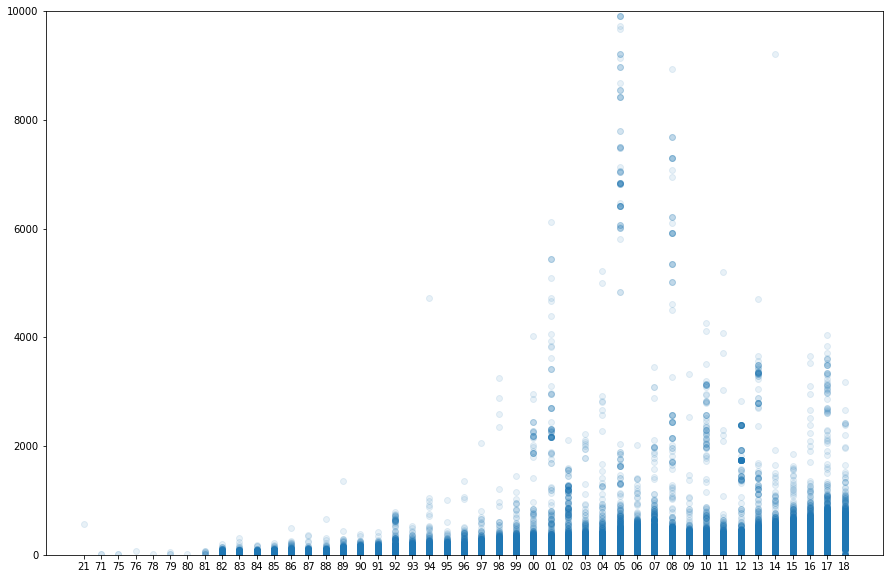

In [153]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_ylim((0, 10000))
ax.scatter(yrs, prices, alpha=.1)

In [145]:
zipcodes = []
for key, value in merged_data.items():
    zipcode = value['ZipCode']
    zipcodes.append(zipcode)

In [146]:
zipped_zipcode = list(zip(yr, zipcodes))

In [148]:
z_zip = sorted(zipped_zipcode, key=lambda x: int(x[0])+2000 if int(x[0]) < 20 else int(x[0])+1900)

In [154]:
yrs, zipcode = list(zip(*z_zip))

In [155]:
zipcode

('98122',
 '98119',
 '98056',
 '98038',
 '98001',
 '98022',
 '98119',
 '98148',
 '98146',
 '98148',
 '98002',
 '98008',
 '98288',
 '98022',
 '98027',
 '98092',
 '98077',
 '98006',
 '98077',
 '98001',
 '98072',
 '98027',
 '98024',
 '98072',
 '98198',
 '98178',
 '98040',
 '',
 '98023',
 '98027',
 '98199',
 '98027',
 '98034',
 '98042',
 '98117',
 '98103',
 '98188',
 '98125',
 '98107',
 '98107',
 '98070',
 '98001',
 '98115',
 '98103',
 '98027',
 '98059',
 '98115',
 '98042',
 '98004',
 '98118',
 '98117',
 '98103',
 '98125',
 '98022',
 '98168',
 '98144',
 '98198',
 '98074',
 '98108',
 '98010',
 '98136',
 '',
 '98038',
 '98288',
 '98177',
 '98019',
 '98027',
 '98032',
 '98103',
 '98103',
 '98105',
 '98092',
 '98006',
 '98053',
 '98112',
 '98072',
 '98058',
 '98008',
 '98198',
 '98117',
 '98133',
 '98115',
 '98038',
 '98136',
 '98103',
 '98022',
 '98148',
 '98030',
 '98074',
 '98055',
 '98058',
 '98027',
 '98019',
 '98070',
 '98042',
 '98032',
 '98072',
 '98058',
 '98030',
 '98103',
 '98199',


In [170]:
yrs_98024 = yrs[zipcode=='98024']

In [171]:
yrs_98115 = yrs[zipcode=='98115']

In [172]:
prices_98024 = prices[zipcode=='98024']

In [175]:
prices_98115 = prices[zipcode=='98115']

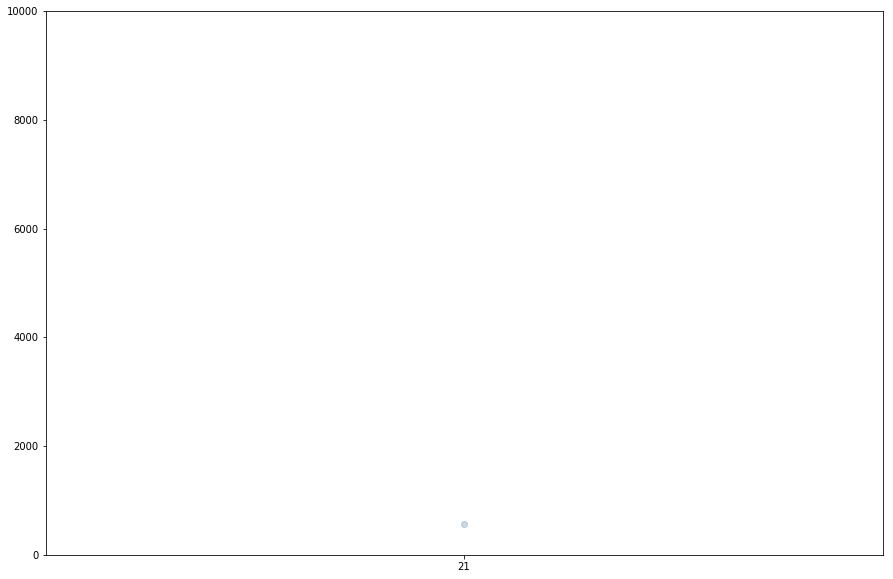

In [176]:
colors = {'98101': 'r', '98024': 'b'}
fig, ax = plt.subplots(figsize=(15,10))
ax.set_ylim((0, 10000))
ax.scatter(yrs_98024, prices_98024, alpha=.1, c='b', label = '98024')
ax.scatter(yrs_98101, prices_98115, alpha=.1, c='g', label = '98115')

In [177]:
def make_list_of_lists(dict_of_dicts):
    matrix = []
    header = list(next(dict_of_dicts.values()).keys())
    matrix.append(header)
    for val_dict in dict_of_dicts.keys():
        row = []
        for val in val_dict.keys():
            row.extend(val)
        matrix.append([row])
    return matrix

In [178]:
merged_data2 = copy.deepcopy(merged_data)

In [179]:
matrix = make_list_of_lists(merged_data2)

TypeError: 'dict_values' object is not an iterator